In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You are using pip version 18.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import random

from surprise import Reader, Dataset, SVD, evaluate, accuracy
from surprise.model_selection import GridSearchCV, KFold, train_test_split
from surprise.model_selection.validation import cross_validate
from surprise.prediction_algorithms.matrix_factorization import SVDpp
import numpy as np
from sklearn.model_selection import train_test_split

import time

import warnings; warnings.simplefilter('ignore')

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
#ratings = pd.read_csv('C:/New Partition/ML/Project/ml-20m (2)/ml-20m/ratings.csv')
#ratings = pd.read_csv('C:/New Partition/ML/Project/ml-20m (2)/ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
ratings.shape

(100836, 4)

In [4]:
rated_movs = ratings.groupby('movieId').sum()
rated_movs.shape

(9724, 3)

In [5]:
rated_movs

,userId,rating,timestamp
movieId,,,
1,65904,843.0,242914455479
2,36251,377.5,124938583322
3,14747,169.5,52265734386
4,1539,16.5,6290052048
5,14679,150.5,48640552594
...,...,...,...
193581,184,4.0,1537109082
193583,184,3.5,1537109545
193585,184,3.5,1537109805


In [6]:
users = ratings.groupby('userId').sum()
users.shape

(610, 3)

In [7]:
users.head()

,movieId,rating,timestamp
userId,,,
1,430268,1013.0,223876652163
2,2040158,114.5,41925735739
3,275277,95.0,50952090433
4,428140,768.0,208626691177
5,15129,160.0,37287142755


In [8]:
users


,movieId,rating,timestamp
userId,,,
1,430268,1013.0,223876652163
2,2040158,114.5,41925735739
3,275277,95.0,50952090433
4,428140,768.0,208626691177
5,15129,160.0,37287142755
...,...,...,...
606,10806800,4078.0,1315155614819
607,347939,708.0,180414617424
608,3741665,2604.5,932937347826


Text(0.5, 1.0, 'Rating Distribution (all users)')

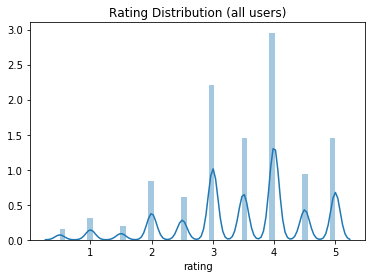

In [9]:
sns.distplot(ratings['rating'])
#sns.boxplot(ratings['rating'])
plt.title('Rating Distribution (all users)')

In [10]:
n_users = ratings.userId.unique().shape[0]
n_movies = ratings.movieId.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies))

Number of users = 610 | Number of movies = 9724


In [11]:
reader = Reader(rating_scale=(1, 5))

In [12]:
reader

In [13]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [14]:
# define a cross-validation iterator

start = time.time()

kf = KFold(n_splits=5)

algo = SVD(verbose=True)

for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    #predictions = algo.train(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)
    
    
print("Runtime %0.2f" % (time.time() - start))

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 0.8749
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 0.8723
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Proc

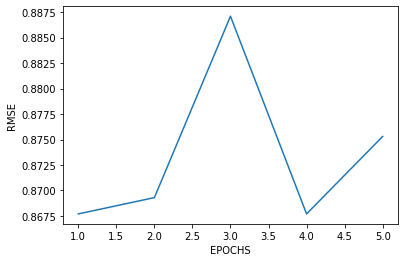

In [15]:
plt.plot([1, 2, 3, 4, 5], [0.8677,0.8693, 0.8871, 0.8677, 0.8753])
plt.ylabel('RMSE')
plt.xlabel('EPOCHS')
plt.show()

In [16]:
data_m = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
# Load the full dataset.

raw_ratings = data_m.raw_ratings
random.shuffle(raw_ratings)

# A = 90% of the data, B = 10% of the data
threshold = int(.7 * len(raw_ratings))
A_raw_ratings = raw_ratings[:threshold]
B_raw_ratings = raw_ratings[threshold:]

data_m.raw_ratings = A_raw_ratings  # data is now the set A

# Fiding best algo with grid search.
param_grid = {'lr_all': [0.002, 0.005, 0.004],'reg_all': [0.4, 0.6, 0.8],
              'n_epochs': [3, 5]}
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
grid_search.fit(data_m)
algo = grid_search.best_estimator['rmse']

# retrain 
trainset = data_m.build_full_trainset()
algo.fit(trainset)

# Compute on trainset
predictions = algo.test(trainset.build_testset())
print('Biased accuracy on A,', end='   ')
accuracy.rmse(predictions)

# Compute on testset
testset = data_m.construct_testset(B_raw_ratings)  # testset is now the set B
predictions = algo.test(testset)
print('Unbiased accuracy on B,', end=' ')
accuracy.rmse(predictions)

Biased accuracy on A,   RMSE: 0.8781
Unbiased accuracy on B, RMSE: 0.9025


0.9024507299170692

In [17]:
grid_search.best_params['rmse']

{'lr_all': 0.005, 'reg_all': 0.4, 'n_epochs': 5}

In [18]:
algo.predict(6,6)

Prediction(uid=6, iid=6, r_ui=None, est=3.850814166532062, details={'was_impossible': False})

In [19]:
ratings[ratings['userId'] == 6]

,userId,movieId,rating,timestamp
560,6,2,4.0,845553522
561,6,3,5.0,845554296
562,6,4,3.0,845554349
563,6,5,5.0,845553938
564,6,6,4.0,845553757
...,...,...,...,...
869,6,1061,4.0,845556860
870,6,1064,4.0,845556579
871,6,1073,3.0,845555571
872,6,1082,4.0,845556278


In [20]:
ratings[ratings['movieId'] == 6].head()

,userId,movieId,rating,timestamp
2,1,6,4.0,964982224
564,6,6,4.0,845553757
1259,11,6,5.0,902154266
1774,18,6,4.0,1460138360
3781,23,6,4.0,1107342267


In [21]:
def check_system(Id,movieId,limit,df=ratings,userId='userId',algo=algo):
    user_df = df[df['userId'] == Id]
    rated_movs = user_df['movieId'].tolist()
    #est_list = []
    
    #for i in range(0,len(rated_movs)):
    #    a = round(algo.predict(userId,rated_movs[i]).est,2)
    #    est_list.append(a)
    
    #user_df['est'] = est_list
    user_df['est'] = user_df['movieId'].apply(lambda x: round(algo.predict(Id,x).est,2))
    
    if limit == None:
        return user_df
    
    else:
        return user_df.head(limit)

In [73]:
runtimes = []

In [74]:

start = time.time()

check_system(345,'movieId',None)

Runtime = time.time() - start
runtimes.append(Runtime)

In [75]:
runtimes

[0.01296091079711914]

In [99]:
check_system(9,'movieId',None).head(30)

,movieId,userId,rating,est,error,avg_error
1102,5451,9,4.0,3.29,-0.71,0.048696
1108,5890,9,4.0,3.39,-0.61,0.048696
1078,922,9,4.0,3.64,-0.36,0.048696
1107,5872,9,3.0,3.08,0.08,0.048696
1081,1095,9,4.0,3.31,-0.69,0.048696
1105,5841,9,1.0,3.04,2.04,0.048696
1118,6044,9,2.0,3.23,1.23,0.048696
1092,3173,9,2.0,3.13,1.13,0.048696
1087,2012,9,4.0,3.21,-0.79,0.048696
1088,2023,9,3.0,3.25,0.25,0.048696


In [77]:
ratings['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [78]:
alt_ratings = pd.DataFrame()
my_ratings = [4.0,3.0,5.0,3.5,4.5,2.0]
for rating in my_ratings:
    temp_df = ratings[ratings['rating'] == rating]
    print(temp_df.shape[0])
    if (temp_df.shape[0]>1000000):
        temp_df = temp_df.sample(n=1000000)
    alt_ratings = pd.concat([alt_ratings,temp_df],axis=0)

26818
20047
13211
13136
8551
7551


In [79]:
'''alt_ratings = pd.DataFrame()
my_ratings = [4.0,3.0,5.0,3.5,4.5,2.0]
for rating in my_ratings:
    temp_df = ratings[ratings['rating'] == rating]
    print(temp_df.shape[0])
    if (temp_df.shape[0]>20000):
        temp_df = temp_df.sample(n=20000)
    alt_ratings = pd.concat([alt_ratings,temp_df],axis=0)'''

"alt_ratings = pd.DataFrame()\nmy_ratings = [4.0,3.0,5.0,3.5,4.5,2.0]\nfor rating in my_ratings:\n    temp_df = ratings[ratings['rating'] == rating]\n    print(temp_df.shape[0])\n    if (temp_df.shape[0]>20000):\n        temp_df = temp_df.sample(n=20000)\n    alt_ratings = pd.concat([alt_ratings,temp_df],axis=0)"

In [80]:
alt_ratings.shape

(89314, 4)

In [81]:
alt_ratings = alt_ratings.drop('timestamp',axis=1)
ratings = ratings.drop('timestamp',axis=1)

In [82]:
ratings_left = [2.5,1.0,1.5,0.5]
for rating in ratings_left:
    temp_df = ratings[ratings['rating'] == rating]
    alt_ratings = pd.concat([alt_ratings,temp_df],axis=0)

In [83]:
alt_ratings['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

Text(0.5, 1.0, 'Rating Distribution (adjusted)')

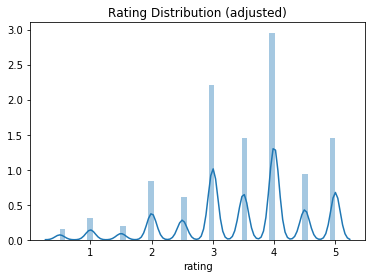

In [84]:
sns.distplot(alt_ratings['rating'])
plt.title('Rating Distribution (adjusted)')

In [85]:
data = Dataset.load_from_df(alt_ratings[['userId', 'movieId', 'rating']], reader)

In [86]:
# define a cross-validation iterator

start = time.time()

kf = KFold(n_splits=5)

svd = SVD(verbose=True)

for trainset, testset in kf.split(data):

    # train and test algorithm.
    svd.fit(trainset)
    alt_pred = svd.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(alt_pred, verbose=True)
    
print("Runtime %0.2f" % (time.time() - start))

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 0.8633
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 0.8689
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Proc

In [87]:
def check_system(Id,movieId,limit,df=ratings,userId='userId',algo=algo):
    '''
    This function checks the predicted rating against ratings made by the user
    And takes in an int UserId (Id)
    an int limit (the number of movies returned)
    dataframe columns necessary (movieId, userId)
    a dataframe of ratings (df)
    an algorithm (algo)
    '''
    # Isolates necessary columns from the dataframe
    df = df[[movieId,userId,'rating']]
    
    # Takes a subsample of the user's ratings
    user_df = df[df['userId'] == Id]
    if user_df.shape[0] >= df[userId].value_counts().mean():
        user_df = user_df.sample(frac=.10)
    else:
        user_df = user_df.sample(frac=.50)

    # Builds the dataframe to be returned     
    user_df['est'] = user_df['movieId'].apply(lambda x: round(algo.predict(Id,x).est,2))
    user_df['error'] = user_df['est']-user_df['rating']
    user_df['avg_error'] = user_df['error'].mean()
    
    # Returns a dataframe dependent on what the limit is set to
    if limit == None:
        return user_df
    
    else:
        return user_df.head(limit)
    


In [88]:
check_system(115, 'movieId', 10)

,movieId,userId,rating,est,error,avg_error
18207,2002,115,3.0,3.29,0.29,0.08
18197,1610,115,5.0,3.83,-1.17,0.08
18189,1377,115,1.0,3.39,2.39,0.08
18229,2772,115,1.0,3.40,2.40,0.08
18252,3555,115,5.0,3.63,-1.37,0.08
18185,1241,115,1.0,3.69,2.69,0.08
18158,296,115,5.0,4.12,-0.88,0.08
18225,2719,115,3.0,3.32,0.32,0.08
18243,3114,115,5.0,3.89,-1.11,0.08
18234,2867,115,4.0,3.62,-0.38,0.08


In [89]:

# find them

find_user = ratings.copy()
find_user['count'] = 1
find_user = find_user.groupby('userId').sum()
find_user[find_user['count'] == 35].head(1)

,movieId,rating,count
userId,,,
71,22650,126.0,35


In [100]:
check_system(315, 'movieId', 10)

,movieId,userId,rating,est,error,avg_error
48717,1084,315,4.0,3.63,-0.37,0.08875
48732,2132,315,3.0,3.53,0.53,0.08875
48722,1251,315,4.0,3.44,-0.56,0.08875
48727,1947,315,4.0,3.47,-0.53,0.08875
48739,2870,315,3.0,3.44,0.44,0.08875
48729,2015,315,3.0,3.45,0.45,0.08875
48738,2863,315,2.0,3.34,1.34,0.08875
48718,1201,315,3.0,3.67,0.67,0.08875
48709,154,315,4.0,3.49,-0.51,0.08875
48733,2136,315,3.0,3.18,0.18,0.08875


In [91]:
movies_df = pd.read_csv('C:/New Partition/ML/Project/ml-20m (2)/ml-20m/movies.csv')
movies_df = movies_df[['movieId','title']]

movies_df=movies_df.set_index('movieId')
movies_df.head(-1)

,title
movieId,
1,Toy Story (1995)
2,Jumanji (1995)
3,Grumpier Old Men (1995)
4,Waiting to Exhale (1995)
5,Father of the Bride Part II (1995)
...,...
131252,Forklift Driver Klaus: The First Day on the Jo...
131254,Kein Bund für's Leben (2007)
131256,"Feuer, Eis & Dosenbier (2002)"


In [93]:
def predict_ratings(Id, movieId, n, df=ratings, userId='userId', algo=algo):
    # Select some random movies from our set
    df = df[[movieId,userId,'rating']]
    movie_choices = df[movieId].unique()
    movies = np.random.choice(movie_choices,n)
    mov_list=movies.tolist()
    #print(movies)
    #print(mov_list)
    # Build the dataframe that we'll return
    predicted_df = pd.DataFrame()
    predicted_df['movieId'] = movies
    predicted_df['userId'] = Id
    
    predicted_df['est'] = predicted_df['movieId'].apply(lambda x: round(algo.predict(Id,x).est,2))
    
    #print(movies_df.loc[mov_list])
    predicted_df = pd.merge(predicted_df,movies_df,on='movieId')
    
    
    return predicted_df[[userId,movieId,'title','est']]

In [94]:
predict_ratings(118205,'movieId',10)

,userId,movieId,title,est
0,118205,5379,"Believer, The (2001)",3.60
1,118205,98361,Byzantium (2012),3.50
2,118205,1914,Smoke Signals (1998),3.53
3,118205,7209,M. Hulot’s Holiday (Mr. Hulot's Holiday) (Vaca...,3.52
4,118205,2090,"Rescuers, The (1977)",3.45
5,118205,33679,Mr. & Mrs. Smith (2005),3.43
6,118205,2428,"Faculty, The (1998)",3.23
7,118205,6850,Leap of Faith (1992),3.50
8,118205,253,Interview with the Vampire: The Vampire Chroni...,3.52
9,118205,2361,Pink Flamingos (1972),3.46


In [95]:
def predicted_top_n(Id, movieId, n, samples, df=ratings, userId='userId', algo=algo):
    '''
    This function returns n movies, sorted by predicted user rating, from a random sample of movies. 
    '''
    df = df[[movieId,userId,'rating']]

    movie_choices = df[movieId].unique()
    
    # Take out movies the user has already watched
    temp_df = ratings[ratings[userId] == Id]
    watched_movs = temp_df[movieId].unique()
    unwatched = np.setdiff1d(movie_choices,watched_movs)
    #unwatched = np.setdiff1d(movie_choices,movies_watched)
    
    # Select random movies according to 'samples'
    if samples == None:
        movies = unwatched
        samples = movies.shape[0]
    elif samples <= unwatched.shape[0]:
         movies = np.random.choice(unwatched,samples)
    else:
        print("The sample size exceeds the available movies. Reset to {} movies".format(unwatched.shape[0]))
        movies = unwatched
        samples = movies.shape[0]
        
    # Build the dataframe that we'll return
    predicted_df = pd.DataFrame()
    predicted_df[movieId] = movies
    predicted_df[userId] = Id
    predicted_df['est'] = predicted_df[movieId].apply(lambda x: round(algo.predict(Id,x).est,2))
    predicted_df = predicted_df.sort_values(by='est', ascending=False)
    
    if n >= samples:
        predicted_df = pd.merge(predicted_df,movies_df,on=movieId)
        return predicted_df[[userId,'title','est']]
    else:
        predicted_df = predicted_df.head(n)
        predicted_df = pd.merge(predicted_df,movies_df,on=movieId)
        return predicted_df[[userId,'title','est']]


In [96]:
predicted_top_n(118205, 'movieId', 10, None)

,userId,title,est
0,118205,"Shawshank Redemption, The (1994)",4.12
1,118205,Star Wars: Episode IV - A New Hope (1977),4.03
2,118205,Casablanca (1942),4.03
3,118205,"Dark Knight, The (2008)",4.02
4,118205,"Godfather, The (1972)",4.01
5,118205,"Usual Suspects, The (1995)",4.01
6,118205,Pulp Fiction (1994),4.01
7,118205,Schindler's List (1993),4.01
8,118205,"Silence of the Lambs, The (1991)",3.99
9,118205,"Godfather: Part II, The (1974)",3.99


In [97]:
predicted_top_n(9, 'movieId', 10, None)

,userId,title,est
0,9,"Shawshank Redemption, The (1994)",3.95
1,9,Casablanca (1942),3.91
2,9,Star Wars: Episode IV - A New Hope (1977),3.91
3,9,"Silence of the Lambs, The (1991)",3.88
4,9,Snatch (2000),3.87
5,9,"Godfather, The (1972)",3.87
6,9,"Usual Suspects, The (1995)",3.87
7,9,Schindler's List (1993),3.87
8,9,One Flew Over the Cuckoo's Nest (1975),3.86
9,9,"Dark Knight, The (2008)",3.86
